In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# กำหนดรหัสหุ้น
tickers = [
    "PTT.BK", "DELTA.BK", "ADVANC.BK", "GULF.BK", "AOT.BK",
    "PTTEP.BK", "CPALL.BK", "SCB.BK", "KBANK.BK", "TRUE.BK"
]

# รายการเก็บผลลัพธ์
all_financial_data = {}

for ticker in tickers:
    # ดึงข้อมูลงบการเงินของแต่ละหุ้น
    stock = yf.Ticker(ticker)
    cash_flow_statement = stock.cashflow.T  # Transpose ข้อมูลเพื่อให้ปีเป็นคอลัมน์
    balance_sheet = stock.balance_sheet.T  # Transpose ข้อมูลเพื่อให้ปีเป็นคอลัมน์

    # คีย์ที่ต้องการดึงข้อมูล
    current_assets_key = "Current Assets"
    current_liabilities_key = "Current Liabilities"
    cash_and_cash_equivalents_key = "Cash And Cash Equivalents"
    total_assets_key = "Total Assets"
    total_liabilities_key = "Total Liabilities Net Minority Interest"
    operating_cash_flow_key = "Operating Cash Flow"

    # ตรวจสอบว่าแต่ละคีย์มีอยู่ในข้อมูลหรือไม่
    if (current_assets_key in balance_sheet.columns and
        current_liabilities_key in balance_sheet.columns and
        cash_and_cash_equivalents_key in balance_sheet.columns and
        total_assets_key in balance_sheet.columns and
        total_liabilities_key in balance_sheet.columns and
        operating_cash_flow_key in cash_flow_statement.columns):

        # ดึงข้อมูล
        current_assets = balance_sheet[current_assets_key]
        current_liabilities = balance_sheet[current_liabilities_key]
        cash_and_cash_equivalents = balance_sheet[cash_and_cash_equivalents_key]
        total_assets = balance_sheet[total_assets_key]
        total_liabilities = balance_sheet[total_liabilities_key]
        operating_cash_flow = cash_flow_statement[operating_cash_flow_key]

        # คำนวณอัตราส่วน
        current_ratio = current_assets / current_liabilities
        quick_ratio = (current_assets - cash_and_cash_equivalents) / current_liabilities
        cash_ratio = cash_and_cash_equivalents / current_liabilities
        operating_cash_flow_ratio = operating_cash_flow / current_liabilities

        # รวมข้อมูลเข้า DataFrame
        financial_data = pd.DataFrame({
            "Current Ratio": current_ratio,
            "Quick Ratio": quick_ratio,
            "Cash Ratio": cash_ratio,
            "Operating Cash Flow Ratio": operating_cash_flow_ratio
        })

        # เก็บข้อมูลใน dictionary
        all_financial_data[ticker] = financial_data
    else:
        all_financial_data[ticker] = None  # ใช้ None แทนที่จะเป็น string

# กรองข้อมูลที่ไม่เป็น DataFrame
valid_data = {ticker: data for ticker, data in all_financial_data.items() if data is not None}

# แปลงข้อมูลทั้งหมดเป็น DataFrame เดียวสำหรับการแสดงผล
financial_comparison = pd.concat(valid_data, axis=0)
financial_comparison.reset_index(inplace=True)

# ปรับชื่อคอลัมน์ใหม่
financial_comparison.rename(columns={"level_0": "Stock", "level_1": "Ratio Type", 0: "Value"}, inplace=True)




In [ ]:
!pip install yfinance

    Stock       Date     Ratio Type     Value
0  PTT.BK 2024-12-31  Current Ratio  1.809448
1  PTT.BK 2023-12-31  Current Ratio  1.837474
2  PTT.BK 2022-12-31  Current Ratio  1.756611
3  PTT.BK 2021-12-31  Current Ratio  1.732508
4  PTT.BK 2020-12-31  Current Ratio       NaN


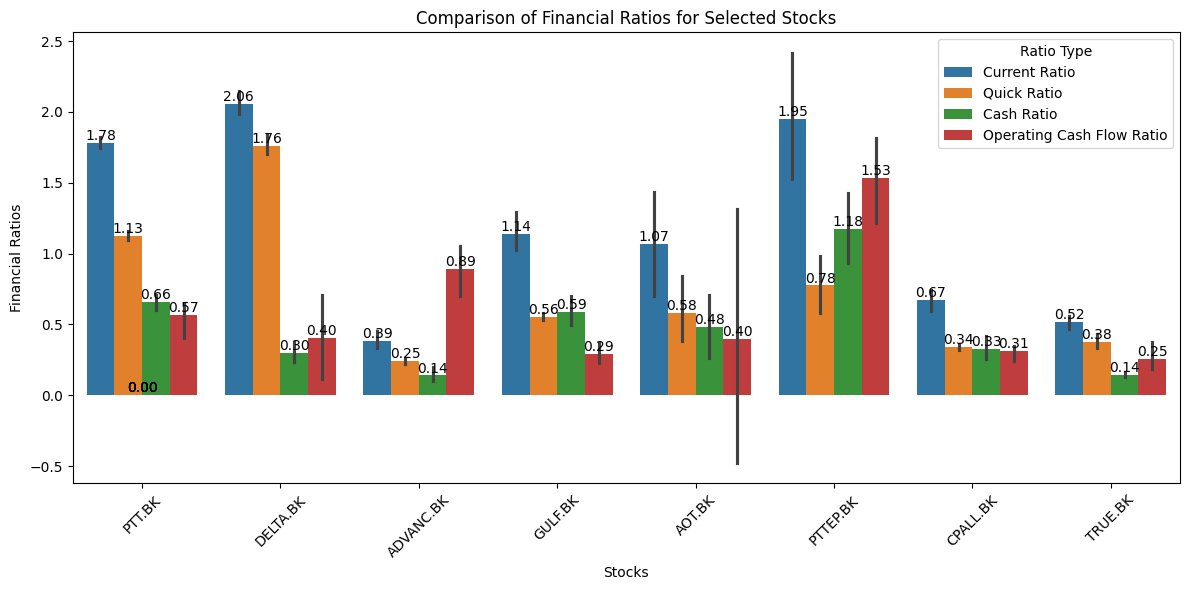

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# กำหนดรหัสหุ้น
tickers = [
    "PTT.BK", "DELTA.BK", "ADVANC.BK", "GULF.BK", "AOT.BK",
    "PTTEP.BK", "CPALL.BK", "SCB.BK", "KBANK.BK", "TRUE.BK"
]

# รายการเก็บผลลัพธ์
all_financial_data = {}

for ticker in tickers:
    # ดึงข้อมูลงบการเงินของแต่ละหุ้น
    stock = yf.Ticker(ticker)
    cash_flow_statement = stock.cashflow.T  # Transpose ข้อมูลเพื่อให้ปีเป็นคอลัมน์
    balance_sheet = stock.balance_sheet.T  # Transpose ข้อมูลเพื่อให้ปีเป็นคอลัมน์

    # คีย์ที่ต้องการดึงข้อมูล
    current_assets_key = "Current Assets"
    current_liabilities_key = "Current Liabilities"
    cash_and_cash_equivalents_key = "Cash And Cash Equivalents"
    total_assets_key = "Total Assets"
    total_liabilities_key = "Total Liabilities Net Minority Interest"
    operating_cash_flow_key = "Operating Cash Flow"

    # ตรวจสอบว่าแต่ละคีย์มีอยู่ในข้อมูลหรือไม่
    if (current_assets_key in balance_sheet.columns and
        current_liabilities_key in balance_sheet.columns and
        cash_and_cash_equivalents_key in balance_sheet.columns and
        total_assets_key in balance_sheet.columns and
        total_liabilities_key in balance_sheet.columns and
        operating_cash_flow_key in cash_flow_statement.columns):

        # ดึงข้อมูล
        current_assets = balance_sheet[current_assets_key]
        current_liabilities = balance_sheet[current_liabilities_key]
        cash_and_cash_equivalents = balance_sheet[cash_and_cash_equivalents_key]
        total_assets = balance_sheet[total_assets_key]
        total_liabilities = balance_sheet[total_liabilities_key]
        operating_cash_flow = cash_flow_statement[operating_cash_flow_key]

        # คำนวณอัตราส่วน
        current_ratio = current_assets / current_liabilities
        quick_ratio = (current_assets - cash_and_cash_equivalents) / current_liabilities
        cash_ratio = cash_and_cash_equivalents / current_liabilities
        operating_cash_flow_ratio = operating_cash_flow / current_liabilities
        # รวมข้อมูลเข้า DataFrame
        financial_data = pd.DataFrame({
            "Current Ratio": current_ratio,
            "Quick Ratio": quick_ratio,
            "Cash Ratio": cash_ratio,
            "Operating Cash Flow Ratio": operating_cash_flow_ratio
        })

        # เก็บข้อมูลใน dictionary
        all_financial_data[ticker] = financial_data
    else:
        all_financial_data[ticker] = None  # ใช้ None แทนที่จะเป็น string

# กรองข้อมูลที่ไม่เป็น DataFrame
valid_data = {ticker: data for ticker, data in all_financial_data.items() if data is not None}

# แปลงข้อมูลทั้งหมดเป็น DataFrame เดียวสำหรับการแสดงผล
financial_comparison = pd.concat(valid_data, axis=0)

# รีเซ็ตดัชนีและจัดรูปแบบใหม่
financial_comparison.reset_index(inplace=True)
financial_comparison.rename(columns={"level_0": "Stock", "level_1": "Date"}, inplace=True)

# Reshape the DataFrame to create a 'Value' column
financial_comparison = financial_comparison.melt(id_vars=["Stock", "Date"], var_name="Ratio Type", value_name="Value")

# ตรวจสอบข้อมูล
print(financial_comparison.head())

# แสดงภาพเปรียบเทียบ
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Stock", y="Value", hue="Ratio Type", data=financial_comparison)

# แสดงค่าของแต่ละแท่งในกราฟ
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title("Comparison of Financial Ratios for Selected Stocks")
plt.ylabel("Financial Ratios")
plt.xlabel("Stocks")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# ส่งออกข้อมูลไปยังไฟล์ Excel
output_file = "financial_comparison.xlsx"
financial_comparison.to_excel(output_file, index=False)

# ยืนยันการส่งออก
print(f"Data has been exported to {output_file}")


Data has been exported to financial_comparison.xlsx


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# กำหนดรหัสหุ้น
tickers = [
    "PTT.BK", "DELTA.BK", "ADVANC.BK", "GULF.BK", "AOT.BK",
    "PTTEP.BK", "CPALL.BK", "SCB.BK", "KBANK.BK", "TRUE.BK"
]

# รายการเก็บผลลัพธ์
all_financial_data = {}

# ดึงข้อมูลและคำนวณอัตราส่วนทางการเงิน
for ticker in tickers:
    # ดึงข้อมูลงบการเงินของแต่ละหุ้น
    stock = yf.Ticker(ticker)
    cash_flow_statement = stock.cashflow.T  # Transpose ข้อมูลเพื่อให้ปีเป็นคอลัมน์
    balance_sheet = stock.balance_sheet.T  # Transpose ข้อมูลเพื่อให้ปีเป็นคอลัมน์

    # คีย์ที่ต้องการดึงข้อมูล
    current_assets_key = "Current Assets"
    current_liabilities_key = "Current Liabilities"
    cash_and_cash_equivalents_key = "Cash And Cash Equivalents"
    total_assets_key = "Total Assets"
    total_liabilities_key = "Total Liabilities Net Minority Interest"
    operating_cash_flow_key = "Operating Cash Flow"

    # ตรวจสอบว่าแต่ละคีย์มีอยู่ในข้อมูลหรือไม่
    if (current_assets_key in balance_sheet.columns and
        current_liabilities_key in balance_sheet.columns and
        cash_and_cash_equivalents_key in balance_sheet.columns and
        total_assets_key in balance_sheet.columns and
        total_liabilities_key in balance_sheet.columns and
        operating_cash_flow_key in cash_flow_statement.columns):

        # ดึงข้อมูล
        current_assets = balance_sheet[current_assets_key]
        current_liabilities = balance_sheet[current_liabilities_key]
        cash_and_cash_equivalents = balance_sheet[cash_and_cash_equivalents_key]
        total_assets = balance_sheet[total_assets_key]
        total_liabilities = balance_sheet[total_liabilities_key]
        operating_cash_flow = cash_flow_statement[operating_cash_flow_key]

        # คำนวณอัตราส่วน
        current_ratio = current_assets / current_liabilities
        quick_ratio = (current_assets - cash_and_cash_equivalents) / current_liabilities
        cash_ratio = cash_and_cash_equivalents / current_liabilities
        operating_cash_flow_ratio = operating_cash_flow / current_liabilities

        # รวมข้อมูลเข้า DataFrame
        financial_data = pd.DataFrame({
            "Stock": ticker,
            "Ratio Type": current_ratio.index,
            "Current Ratio": current_ratio.values,
            "Quick Ratio": quick_ratio.values,
            "Cash Ratio": cash_ratio.values,
            "Operating Cash Flow Ratio": operating_cash_flow_ratio.values
        })

        # เก็บข้อมูลใน dictionary
        all_financial_data[ticker] = financial_data
    else:
        # หากไม่พบข้อมูลที่ต้องการ ให้เก็บข้อความแสดงข้อผิดพลาด
        all_financial_data[ticker] = "ไม่พบคีย์ที่ต้องการ"

# กรองเฉพาะข้อมูลที่เป็น DataFrame
valid_financial_data = [df for df in all_financial_data.values() if isinstance(df, pd.DataFrame)]

# รวมข้อมูลทั้งหมดเป็น DataFrame
financial_comparison = pd.concat(valid_financial_data, axis=0)
financial_comparison.reset_index(drop=True, inplace=True)

# แสดงผลแยกตามหุ้นและปี
for ticker in financial_comparison['Stock'].unique():
    print(f"\nFinancial Data for {ticker}:")

    # กรองข้อมูลสำหรับหุ้นแต่ละตัว
    stock_data = financial_comparison[financial_comparison['Stock'] == ticker]

    # แสดงข้อมูลแยกตามปี
    for year in stock_data['Ratio Type'].unique():
        print(f"\nYear: {year}")
        year_data = stock_data[stock_data['Ratio Type'] == year]
        print(year_data[['Current Ratio', 'Quick Ratio', 'Cash Ratio', 'Operating Cash Flow Ratio']])

# ส่งออกข้อมูลไปยังไฟล์ Excel
output_file = "financial_comparison.xlsx"
financial_comparison.to_excel(output_file, index=False)

# ยืนยันการส่งออก
print(f"\nData has been exported to {output_file}")





Financial Data for PTT.BK:

Year: 2024-12-31 00:00:00
  Current Ratio Quick Ratio Cash Ratio Operating Cash Flow Ratio
0      1.809448    1.097539   0.711909                  0.655856

Year: 2023-12-31 00:00:00
  Current Ratio Quick Ratio Cash Ratio Operating Cash Flow Ratio
1      1.837474    1.128917   0.708556                  0.648953

Year: 2022-12-31 00:00:00
  Current Ratio Quick Ratio Cash Ratio Operating Cash Flow Ratio
2      1.756611    1.182719   0.573892                  0.323522

Year: 2021-12-31 00:00:00
  Current Ratio Quick Ratio Cash Ratio Operating Cash Flow Ratio
3      1.732508    1.099003   0.633505                  0.653144

Year: 2020-12-31 00:00:00
  Current Ratio Quick Ratio Cash Ratio Operating Cash Flow Ratio
4           NaN         NaN        NaN                       NaN

Financial Data for DELTA.BK:

Year: 2024-12-31 00:00:00
  Current Ratio Quick Ratio Cash Ratio Operating Cash Flow Ratio
5       2.16465    1.752841   0.411808                  0.819591


การใช้โมเดล K-Nearest Neighbors (KNN) สำหรับการจัดกลุ่ม (Clustering) ข้อมูลทางการเงินเป็นกระบวนการที่สามารถแบ่งออกเป็นหลายขั้นตอน ได้แก่ การเตรียมข้อมูล การสร้างและฝึกโมเดล การประเมินผล และการแสดงผลลัพธ์ สำหรับกรณีนี้เราจะใช้ KNN ในการจัดกลุ่มหุ้นที่มีลักษณะทางการเงินคล้ายกัน

ขั้นตอนการใช้ K-Nearest Neighbors (KNN) สำหรับการจัดกลุ่ม:
1. ติดตั้งไลบรารีที่จำเป็น
หากยังไม่มีการติดตั้งไลบรารีที่จำเป็น เราต้องติดตั้ง scikit-learn, pandas, matplotlib, และ seaborn ก่อน

In [ ]:
!pip install scikit-learn pandas matplotlib seaborn


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split


3. การเตรียมข้อมูล
สมมติว่าเรามีข้อมูลทางการเงิน (เช่น อัตราส่วนทางการเงิน) สำหรับแต่ละหุ้นใน financial_comparison ที่ได้จากขั้นตอนก่อนหน้า และข้อมูลเหล่านี้จะใช้ในการจัดกลุ่มหุ้น

ขั้นแรกให้เลือกอัตราส่วนทางการเงินที่ใช้ในการฝึกโมเดล

4. การปรับมาตรฐานข้อมูล (Standardization)
การใช้ KNN ต้องมีการปรับมาตรฐานข้อมูลก่อน เพราะ KNN ใช้ระยะทางในการหาความคล้ายคลึงของข้อมูล

การเลือกจำนวน K สำหรับ KNN
ในขั้นตอนนี้เราจะทำการทดสอบหาค่า K ที่ดีที่สุดที่ใช้ในโมเดล KNN โดยใช้วิธีการคำนวณ Silhouette Score ซึ่งเป็นวิธีในการประเมินคุณภาพของการจัดกลุ่ม

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
# เลือกคอลัมน์ที่ใช้ในการฝึกโมเดล
features = financial_comparison[['Current Ratio', 'Quick Ratio', 'Cash Ratio', 'Operating Cash Flow Ratio']]
features = features.dropna()  # ลบแถวที่มีค่า NaN


In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# สมมติว่าคุณมีข้อมูลที่ถูกปรับขนาดแล้วอยู่ในตัวแปร scaled_features
# scaled_features = ...

sil_scores = []

# ทดสอบค่า K ตั้งแต่ 2 ถึง 10
for k in range(2, 11):  # ขยายช่วงจาก 2 ถึง 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)  # ฝึกโมเดล KMeans
    labels = kmeans.labels_  # ได้ค่าของ label สำหรับแต่ละตัวอย่าง
    score = silhouette_score(scaled_features, labels)  # คำนวณค่า Silhouette Score
    sil_scores.append(score)  # เก็บค่า Silhouette Score ไว้ในลิสต์

# แสดงค่า Silhouette Score และค่า K ที่ดีที่สุด
best_k = np.argmax(sil_scores) + 2  # ใช้ np.argmax เพื่อหาค่า K ที่ดีที่สุด, เพิ่ม 2 เนื่องจากเริ่มต้นที่ K=2
print(f"Best K: {best_k}")


Best K: 3


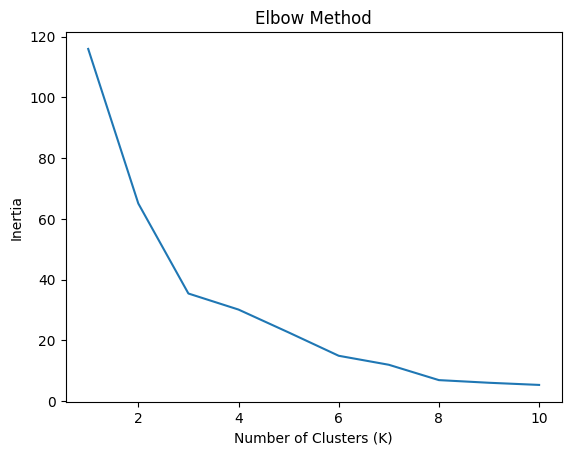

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(3, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    score = silhouette_score(scaled_features, labels)
    sil_scores.append(score)

best_k = np.argmax(sil_scores) + 2  # เนื่องจากเริ่มต้นที่ K=2
print(f"Best K: {best_k}")


Best K: 2


In [ ]:
sil_scores = []

# ทดสอบค่า K ตั้งแต่ 2 ถึง 10 (สามารถขยายช่วงได้)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    score = silhouette_score(scaled_features, labels)
    sil_scores.append(score)

# แสดงค่า Silhouette Score และค่า K ที่ดีที่สุด
best_k = np.argmax(sil_scores) + 2  # ค่าที่ดีที่สุดจะเป็นค่า K ที่ให้คะแนนสูงสุด
print(f"Best K: {best_k}")


Best K: 3


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# สร้างข้อมูลสองมิติแบบสังเคราะห์
X, y = make_blobs(random_state=1)

# สร้างโมเดล KMeans
kmeans = KMeans(n_clusters=2)  # แก้ไขที่นี่

# ฝึกโมเดลกับข้อมูล
kmeans.fit(X)

# แสดงผลการจัดกลุ่ม
print("Cluster memberships:\n{}".format(kmeans.labels_))


Cluster memberships:
[1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1]


In [ ]:
print(kmeans.predict(X))

[1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1]


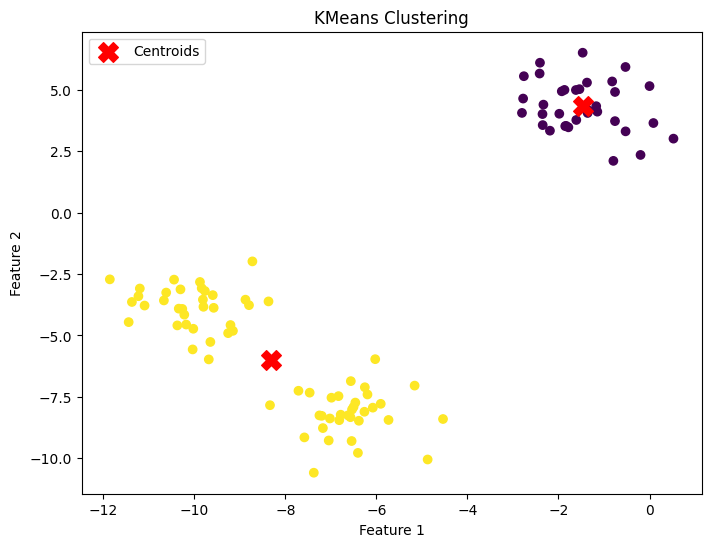

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# สร้างข้อมูลตัวอย่าง
X, y = make_blobs(random_state=1)

# สร้างโมเดล KMeans
kmeans = KMeans(n_clusters=2)

# ฝึกโมเดล
kmeans.fit(X)

# ทำนายคลัสเตอร์
labels = kmeans.labels_

# แสดงผลกราฟ
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')

# แสดงจุดศูนย์กลางของแต่ละคลัสเตอร์
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# ตั้งชื่อและแสดงกราฟ
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


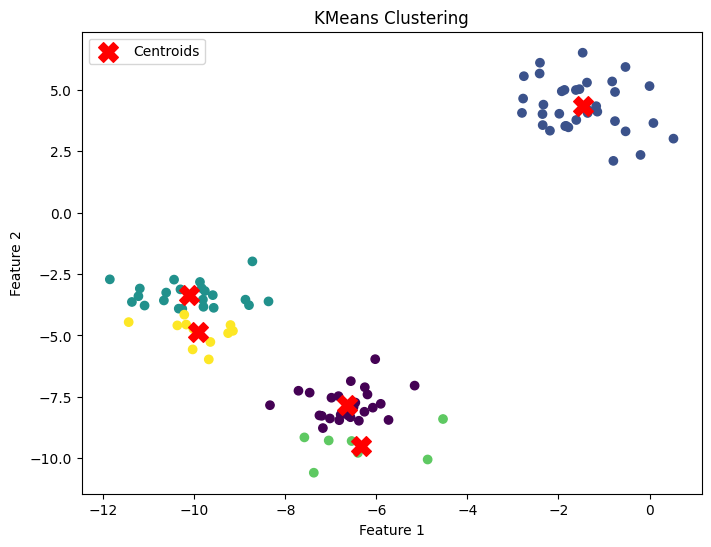

In [ ]:

# สร้างข้อมูลตัวอย่าง
X, y = make_blobs(random_state=1)

# สร้างโมเดล KMeans
kmeans = KMeans(n_clusters=5)

# ฝึกโมเดล
kmeans.fit(X)

# ทำนายคลัสเตอร์
labels = kmeans.labels_

# แสดงผลกราฟ
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')

# แสดงจุดศูนย์กลางของแต่ละคลัสเตอร์
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# ตั้งชื่อและแสดงกราฟ
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

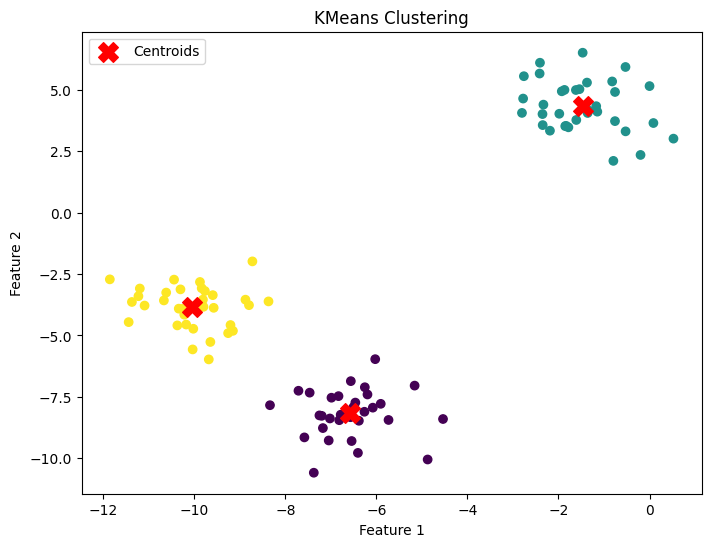

In [ ]:

# สร้างข้อมูลตัวอย่าง
X, y = make_blobs(random_state=1)

# สร้างโมเดล KMeans
kmeans = KMeans(n_clusters=3)

# ฝึกโมเดล
kmeans.fit(X)

# ทำนายคลัสเตอร์
labels = kmeans.labels_

# แสดงผลกราฟ
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')

# แสดงจุดศูนย์กลางของแต่ละคลัสเตอร์
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# ตั้งชื่อและแสดงกราฟ
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()